In [2]:
import matplotlib.pyplot as plt
import time
import numpy as np
import csv
import pandas as pd
from pandas import read_csv

---
Create fat version of *madelon.csv*

In [ ]:
madelon = pd.read_csv("madelon.csv", header=None)

In [ ]:
factor = 2
pd.concat([pd.concat([madelon]*factor, axis=1)]*factor, axis=0).to_csv(f'madelonX{factor**2}.csv', header=False, index=False)

In [ ]:
factor = 3
pd.concat([pd.concat([madelon]*factor, axis=1)]*factor, axis=0).to_csv(f'madelonX{factor**2}.csv', header=False, index=False)

In [ ]:
factor = 4
pd.concat([pd.concat([madelon]*factor, axis=1)]*factor, axis=0).to_csv(f'madelonX{factor**2}.csv', header=False, index=False)

---

In [3]:
cols = [9, 99, 199]
files = ["madelon.csv", "madelonX4.csv", "madelonX9.csv", "madelonX16.csv"]
sizes = [1, 4, 9, 16]

runsA = 10 # number of loops with file-reading
runsB = 10_000 # number of loops with column-copying

results_fileread = pd.DataFrame(index=sizes)
results_columns = pd.DataFrame(index=sizes)

---
## Run profiling of the cpp files

* method_1: read-in without transposing, return transposed columns
* method_1B: same as method_1 but without vector.reserve
* method_2: read-in transposing, return rows
* method_3: same as method_1 but using vector of dynamic arrays instead of vector of vectors as the matrix structure
* method_4: read once recording number of newlines and length of a single line, read the second time storing data in 1D raw array; the returned columns are also packed in a 1D array

---
The external library: file-read.

In [5]:
%%bash
runsA=10
g++ armadillo-fileread.cpp -DARMA_DONT_USE_WRAPPER -lopenblas -llapack -pg
./a.out "madelon.csv" $runsA
gprof > armadillo-fileread.prof
./a.out "madelonX4.csv" $runsA 
gprof > armadillo-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > armadillo-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > armadillo-fileread-X16.prof

10 runs in madelon.csv: 1211 millisec.
10 runs in madelonX4.csv: 4925 millisec.
10 runs in madelonX9.csv: 13737 millisec.
10 runs in madelonX16.csv: 19844 millisec.


In [10]:
%%bash
runsA=10
g++ armadillo-fileread.cpp -DARMA_DONT_USE_WRAPPER -lopenblas -llapack
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA 
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 1178 millisec.
10 runs in madelonX4.csv: 4871 millisec.
10 runs in madelonX9.csv: 10170 millisec.
10 runs in madelonX16.csv: 18377 millisec.


In [34]:
results_fileread['armadillo'] = np.array([1178, 4871, 10170, 18377]) * 1E-3

---
My method (1): file-read.

In [9]:
%%bash
runsA=10
g++ my_method_1-fileread.cpp -pg
./a.out "madelon.csv" $runsA
gprof > my_method_1-fileread.prof
./a.out "madelonX4.csv" $runsA
gprof > my_method_1-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > my_method_1-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > my_method_1-fileread-X16.prof

10 runs in madelon.csv: 3831 millisec.
10 runs in madelonX4.csv: 14792 millisec.
10 runs in madelonX9.csv: 33928 millisec.
10 runs in madelonX16.csv: 62830 millisec.


In [11]:
%%bash
runsA=10
g++ my_method_1-fileread.cpp
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 1421 millisec.
10 runs in madelonX4.csv: 5755 millisec.
10 runs in madelonX9.csv: 12874 millisec.
10 runs in madelonX16.csv: 22451 millisec.


In [33]:
results_fileread['my_method_1'] = np.array([1421, 5755, 12874, 22451]) * 1E-3

---
My method (1B)

In [72]:
%%bash
runsA=10
g++ my_method_1B-fileread.cpp -pg
./a.out "madelon.csv" $runsA
gprof > my_method_1B-fileread.prof
./a.out "madelonX4.csv" $runsA
gprof > my_method_1B-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > my_method_1B-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > my_method_1B-fileread-X16.prof

10 runs in madelon.csv: 3551 millisec.
10 runs in madelonX4.csv: 13964 millisec.
10 runs in madelonX9.csv: 34601 millisec.
10 runs in madelonX16.csv: 57152 millisec.


In [9]:
%%bash
runsA=10
g++ my_method_1B-fileread.cpp
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 1410 millisec.
10 runs in madelonX4.csv: 5641 millisec.
10 runs in madelonX9.csv: 12659 millisec.
10 runs in madelonX16.csv: 22161 millisec.


In [32]:
results_fileread['my_method_1B'] = np.array([1410, 5641, 12659, 22161]) * 1E-3

---
My method (2): file-read.

In [11]:
%%bash
runsA=10
g++ my_method_2-fileread.cpp -pg
./a.out "madelon.csv" $runsA
gprof > my_method_2-fileread.prof
./a.out "madelonX4.csv" $runsA
gprof > my_method_2-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > my_method_2-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > my_method_2-fileread-X16.prof

10 runs in madelon.csv: 3542 millisec.
10 runs in madelonX4.csv: 14631 millisec.
10 runs in madelonX9.csv: 33219 millisec.
10 runs in madelonX16.csv: 59373 millisec.


In [8]:
%%bash
runsA=10
g++ my_method_2-fileread.cpp
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 1541 millisec.
10 runs in madelonX4.csv: 5458 millisec.
10 runs in madelonX9.csv: 12523 millisec.
10 runs in madelonX16.csv: 22358 millisec.


In [31]:
results_fileread['my_method_2'] = np.array([1541, 5458, 12523, 22358]) * 1E-3

---
My method (3): file-read.

In [8]:
%%bash
runsA=10
g++ my_method_3-fileread.cpp -pg
./a.out "madelon.csv" $runsA
gprof > my_method_3-fileread.prof
./a.out "madelonX4.csv" $runsA
gprof > my_method_3-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > my_method_3-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > my_method_3-fileread-X16.prof

10 runs in madelon.csv: 1481 millisec.
10 runs in madelonX4.csv: 5659 millisec.
10 runs in madelonX9.csv: 12610 millisec.
10 runs in madelonX16.csv: 22502 millisec.


In [6]:
%%bash
runsA=10
g++ my_method_3-fileread.cpp
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 979 millisec.
10 runs in madelonX4.csv: 3881 millisec.
10 runs in madelonX9.csv: 8673 millisec.
10 runs in madelonX16.csv: 15432 millisec.


In [30]:
results_fileread['my_method_3'] = np.array([979, 3881, 8673, 15432]) * 1E-3

---
My method (4): file-read.

In [4]:
%%bash
runsA=10
g++ my_method_4-fileread.cpp -std=c++17 -pg
./a.out "madelon.csv" $runsA
gprof > my_method_4-fileread.prof
./a.out "madelonX4.csv" $runsA
gprof > my_method_4-fileread-X4.prof
./a.out "madelonX9.csv" $runsA
gprof > my_method_4-fileread-X9.prof
./a.out "madelonX16.csv" $runsA
gprof > my_method_4-fileread-X16.prof

10 runs in madelon.csv: 1605 millisec.
10 runs in madelonX4.csv: 6921 millisec.
10 runs in madelonX9.csv: 16354 millisec.
10 runs in madelonX16.csv: 29021 millisec.


In [7]:
%%bash
runsA=10
g++ my_method_4-fileread.cpp -std=c++17
./a.out "madelon.csv" $runsA
./a.out "madelonX4.csv" $runsA
./a.out "madelonX9.csv" $runsA
./a.out "madelonX16.csv" $runsA

10 runs in madelon.csv: 994 millisec.
10 runs in madelonX4.csv: 4020 millisec.
10 runs in madelonX9.csv: 10244 millisec.
10 runs in madelonX16.csv: 17149 millisec.


In [29]:
results_fileread['my_method_4'] = np.array([994, 4020, 10244, 17149]) * 1E-3

---
The external library: column-return.

In [12]:
%%bash
runsB=10000
g++ armadillo-columns.cpp -DARMA_DONT_USE_WRAPPER -lopenblas -llapack -pg
./a.out "madelon.csv" $runsB
gprof > armadillo-columns.prof
./a.out "madelonX4.csv" $runsB
gprof > armadillo-columns-X4.prof
./a.out "madelonX9.csv" $runsB
gprof > armadillo-columns-X9.prof
./a.out "madelonX16.csv" $runsB
gprof > armadillo-columns-X16.prof

10000 runs in madelon.csv: 21 millisec.
10000 runs in madelonX4.csv: 42 millisec.
10000 runs in madelonX9.csv: 65 millisec.
10000 runs in madelonX16.csv: 98 millisec.


In [12]:
%%bash
runsB=10000
g++ armadillo-columns.cpp -DARMA_DONT_USE_WRAPPER -lopenblas -llapack
./a.out "madelon.csv" $runsB
./a.out "madelonX4.csv" $runsB
./a.out "madelonX9.csv" $runsB
./a.out "madelonX16.csv" $runsB

10000 runs in madelon.csv: 19 millisec.
10000 runs in madelonX4.csv: 38 millisec.
10000 runs in madelonX9.csv: 60 millisec.
10000 runs in madelonX16.csv: 82 millisec.


In [28]:
results_columns['armadillo'] = np.array([19, 38, 60, 82]) * 1E-3

---
My method (1): column-return.

In [13]:
%%bash
runsB=10000
g++ my_method_1-columns.cpp -pg
./a.out "madelon.csv" $runsB
gprof > my_method_1-columns.prof
./a.out "madelonX4.csv" $runsB
gprof > my_method_1-columns-X4.prof
./a.out "madelonX9.csv" $runsB
gprof > my_method_1-columns-X9.prof
./a.out "madelonX16.csv" $runsB
gprof > my_method_1-columns-X16.prof

10000 runs in madelon.csv: 8382 millisec.
10000 runs in madelonX4.csv: 17164 millisec.
10000 runs in madelonX9.csv: 26135 millisec.
10000 runs in madelonX16.csv: 45855 millisec.


In [13]:
%%bash
runsB=10000
g++ my_method_1-columns.cpp
./a.out "madelon.csv" $runsB
./a.out "madelonX4.csv" $runsB
./a.out "madelonX9.csv" $runsB
./a.out "madelonX16.csv" $runsB

10000 runs in madelon.csv: 1973 millisec.
10000 runs in madelonX4.csv: 3870 millisec.
10000 runs in madelonX9.csv: 6012 millisec.
10000 runs in madelonX16.csv: 9037 millisec.


In [27]:
results_columns['my_method_1'] = np.array([1973, 3870, 6012, 9037]) * 1E-3

---
My method (2): column-return.

In [17]:
%%bash
runsB=10000
g++ my_method_2-columns.cpp -pg
./a.out "madelon.csv" $runsB
gprof > my_method_2-columns.prof
./a.out "madelonX4.csv" $runsB
gprof > my_method_2-columns-X4.prof
./a.out "madelonX9.csv" $runsB
gprof > my_method_2-columns-X9.prof
./a.out "madelonX16.csv" $runsB
gprof > my_method_2-columns-X16.prof

10000 runs in madelon.csv: 64 millisec.
10000 runs in madelonX4.csv: 78 millisec.
10000 runs in madelonX9.csv: 98 millisec.
10000 runs in madelonX16.csv: 132 millisec.


In [14]:
%%bash
runsB=10000
g++ my_method_2-columns.cpp
./a.out "madelon.csv" $runsB
./a.out "madelonX4.csv" $runsB
./a.out "madelonX9.csv" $runsB
./a.out "madelonX16.csv" $runsB

10000 runs in madelon.csv: 27 millisec.
10000 runs in madelonX4.csv: 57 millisec.
10000 runs in madelonX9.csv: 80 millisec.
10000 runs in madelonX16.csv: 95 millisec.


In [26]:
results_columns['my_method_2'] = np.array([27, 57, 80, 95]) * 1E-3

---
My methid (3): column-return.

In [11]:
%%bash
runsB=10000
g++ my_method_3-columns.cpp -pg
./a.out "madelon.csv" $runsB
gprof > my_method_3-columns.prof
./a.out "madelonX4.csv" $runsB
gprof > my_method_3-columns-X4.prof
./a.out "madelonX9.csv" $runsB
gprof > my_method_3-columns-X9.prof
./a.out "madelonX16.csv" $runsB
gprof > my_method_3-columns-X16.prof

10000 runs in madelon.csv: 1846 millisec.
10000 runs in madelonX4.csv: 3783 millisec.
10000 runs in madelonX9.csv: 6334 millisec.
10000 runs in madelonX16.csv: 12476 millisec.


In [18]:
%%bash
runsB=10000
g++ my_method_3-columns.cpp
./a.out "madelon.csv" $runsB
./a.out "madelonX4.csv" $runsB
./a.out "madelonX9.csv" $runsB
./a.out "madelonX16.csv" $runsB

10000 runs in madelon.csv: 560 millisec.
10000 runs in madelonX4.csv: 1373 millisec.
10000 runs in madelonX9.csv: 2024 millisec.
10000 runs in madelonX16.csv: 2854 millisec.


In [25]:
results_columns['my_method_3'] = np.array([560, 1373, 2024, 2854]) * 1E-3

---
My method (4): column-return.

In [21]:
%%bash
runsB=10000
g++ my_method_4-columns.cpp -std=c++17 -pg
./a.out "madelon.csv" $runsB
gprof > my_method_4-columns.prof
./a.out "madelonX4.csv" $runsB
gprof > my_method_4-columns-X4.prof
./a.out "madelonX9.csv" $runsB
gprof > my_method_4-columns-X9.prof
./a.out "madelonX16.csv" $runsB
gprof > my_method_4-columns-X16.prof

10000 runs in madelon.csv: 143 millisec.
10000 runs in madelonX4.csv: 286 millisec.
10000 runs in madelonX9.csv: 440 millisec.
10000 runs in madelonX16.csv: 590 millisec.


In [22]:
%%bash
runsB=10000
g++ my_method_4-columns.cpp -std=c++17
./a.out "madelon.csv" $runsB
./a.out "madelonX4.csv" $runsB
./a.out "madelonX9.csv" $runsB
./a.out "madelonX16.csv" $runsB

10000 runs in madelon.csv: 156 millisec.
10000 runs in madelonX4.csv: 282 millisec.
10000 runs in madelonX9.csv: 431 millisec.
10000 runs in madelonX16.csv: 592 millisec.


In [24]:
results_columns['my_method_4'] = np.array([156, 282, 431, 592]) * 1E-3

---
## Time python functions

---
Read the csv file in using various methods. Repeat *runsA* number of times in a loop. 

In [39]:
def fileread_csv_reader(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = []
        with open(file, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',',
                                quoting=csv.QUOTE_NONNUMERIC)
            for row in reader:
                M.append(row)
        M = np.array(M, dtype='float64')
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [6]:
def fileread_pandas(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = read_csv(file, dtype='float64', header=None).values
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [36]:
def fileread_numpy1(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = np.loadtxt(file, dtype='float64', delimiter=',')
        del M
    time_diff = time.time() - time_0

    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [37]:
def fileread_numpy2(file):
    time_0 = time.time()
    for _ in range(runsA):
        M = np.genfromtxt(file, dtype='float64', delimiter=',')
        del M
    time_diff = time.time() - time_0
    
    print(f"{runsA} runs in {file}: {time_diff} sec.")
    return time_diff

In [40]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = fileread_csv_reader(file)
    results_fileread.loc[size, 'csv_reader'] = result

10 runs in madelon.csv: 1.7986681461334229 sec.
10 runs in madelonX4.csv: 7.556576251983643 sec.
10 runs in madelonX9.csv: 16.89007019996643 sec.
10 runs in madelonX16.csv: 32.03850531578064 sec.


In [7]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = fileread_pandas(file)
    results_fileread.loc[size, 'pandas'] = result

10 runs in madelon.csv: 1.6391961574554443 sec.
10 runs in madelonX4.csv: 5.647595405578613 sec.
10 runs in madelonX9.csv: 11.859610319137573 sec.
10 runs in madelonX16.csv: 18.929800271987915 sec.


In [42]:
for i in range(3):
    file = files[i]
    size = sizes[i]
    result = fileread_numpy1(file)
    results_fileread.loc[size, 'numpy1'] = result

10 runs in madelon.csv: 5.842385768890381 sec.
10 runs in madelonX4.csv: 20.85115647315979 sec.
10 runs in madelonX9.csv: 46.45545172691345 sec.


In [43]:
for i in range(2):
    file = files[i]
    size = sizes[i]
    result = fileread_numpy2(file)
    results_fileread.loc[size, 'numpy2'] = result

10 runs in madelon.csv: 7.253101587295532 sec.
10 runs in madelonX4.csv: 31.02741813659668 sec.


---
Return a copy of a handful of columns from the matrix. Repeat the column-return for *runsB* number of times.

In [4]:
def columns_csv_reader(file):
    M = []
    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',',
                            quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            M.append(row)
    M = np.array(M, dtype='float64')

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [8]:
def columns_pandas(file):
    M = read_csv(file, dtype='float64', header=None).values

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [27]:
def columns_numpy1(file):
    M = np.loadtxt(file, dtype='float64', delimiter=',')

    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [28]:
def columns_numpy2(file):
    M = np.genfromtxt(file, dtype='float64', delimiter=',')
    
    time_0 = time.time()
    for _ in range(runsB):
        column_bunch = M[:, cols].copy()
        del column_bunch
    time_diff = time.time() - time_0

    print(f"{runsB} runs in {file}: {time_diff} sec.")
    return time_diff

In [8]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_csv_reader(file)
    results_columns.loc[size, 'csv_reader'] = result

10000 runs in madelon.csv: 0.6326766014099121 sec.
10000 runs in madelonX4.csv: 1.563420295715332 sec.
10000 runs in madelonX9.csv: 2.3298234939575195 sec.
10000 runs in madelonX16.csv: 3.562917470932007 sec.


In [9]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_pandas(file)
    results_columns.loc[size, 'pandas'] = result

10000 runs in madelon.csv: 0.16580915451049805 sec.
10000 runs in madelonX4.csv: 0.30344152450561523 sec.
10000 runs in madelonX9.csv: 0.43680667877197266 sec.
10000 runs in madelonX16.csv: 0.5689289569854736 sec.


In [31]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_numpy1(file)
    results_columns.loc[size, 'numpy1'] = result

10000 runs in madelon.csv: 0.7240860462188721 sec.
10000 runs in madelonX4.csv: 1.8322606086730957 sec.
10000 runs in madelonX9.csv: 2.4164226055145264 sec.
10000 runs in madelonX16.csv: 3.2561051845550537 sec.


In [32]:
for i in range(4):
    file = files[i]
    size = sizes[i]
    result = columns_numpy2(file)
    results_columns.loc[size, 'numpy2'] = result

10000 runs in madelon.csv: 0.7180073261260986 sec.
10000 runs in madelonX4.csv: 1.7125976085662842 sec.
10000 runs in madelonX9.csv: 2.698593854904175 sec.
10000 runs in madelonX16.csv: 3.3010082244873047 sec.


---

In [10]:
results_fileread.to_pickle("results_fileread.pkl")
results_columns.to_pickle("results_columns.pkl")

In [4]:
results_fileread = pd.read_pickle("results_fileread.pkl")
results_columns = pd.read_pickle("results_columns.pkl")

---
Plot the results

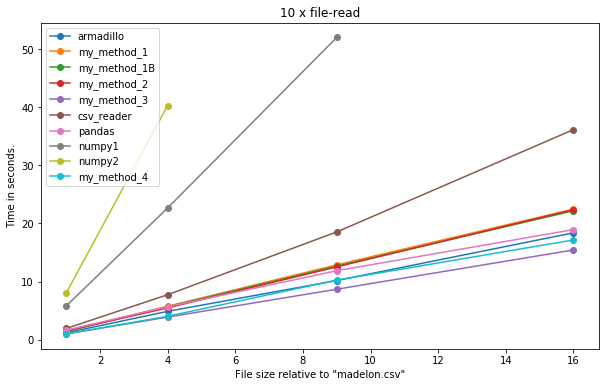

In [11]:
ax = results_fileread.reset_index().plot(x='index', y=results_fileread.columns, marker='o', figsize = (10,6), title=f'{runsA} x file-read')
ax.set_xlabel('File size relative to "madelon.csv"')
ax.set_ylabel(f'Time in seconds.')
plt.show()

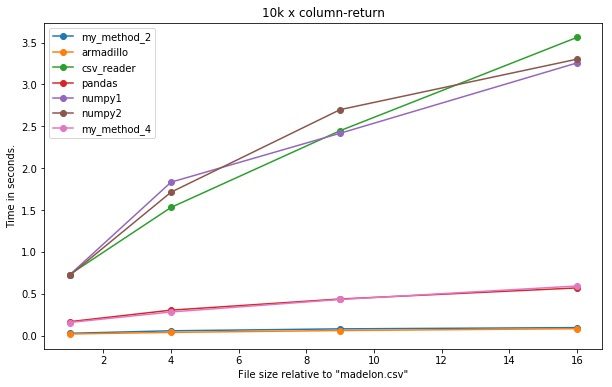

In [12]:
cols = results_columns.columns.drop(['my_method_1', 'my_method_3'])
# my_method_1, my_method_3 are slow

ax = results_columns.reset_index().plot(x='index', y=cols, marker='o', figsize = (10,6), title=f'{runsB//1000}k x column-return')
ax.set_xlabel('File size relative to "madelon.csv"')
ax.set_ylabel(f'Time in seconds.')
plt.show()

---
Discusssed 18-01-2019

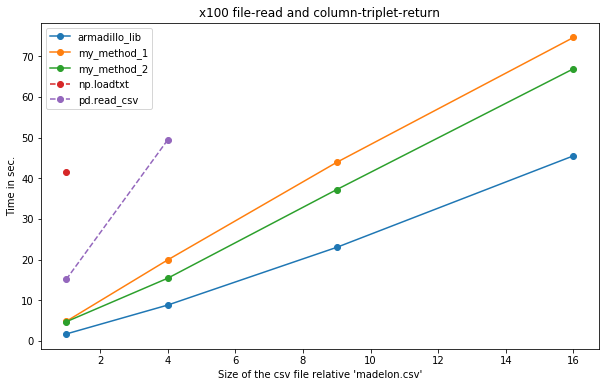

In [21]:
file_size = [1, 4, 9, 16]
time_external = [1.7, 8.8, 23.0, 45.5]
time_my_1 = [4.8, 19.9, 43.9, 74.6]
time_my_2 = [4.7, 15.4, 37.2, 66.9]
py_numpy = [41.6]
py_pandas = [15.1, 49.4]

plt.figure(figsize=(10,6))
plt.plot(file_size, time_external, "-o", label='armadillo_lib')
plt.plot(file_size, time_my_1, "-o", label="my_method_1")
plt.plot(file_size, time_my_2, "-o", label="my_method_2")
plt.plot(file_size[:len(py_numpy)], py_numpy, "--o", label="np.loadtxt")
plt.plot(file_size[:len(py_pandas)], py_pandas, "--o", label="pd.read_csv")

plt.xlabel("Size of the csv file relative to 'madelon.csv'")
plt.ylabel("Time in sec.")
plt.title("x100 file-read and column-triplet-return")
plt.legend()
plt.show()